In [16]:
import pandas as pd
from finta import TA
import numpy as np

In [17]:
#yahoo finance stock data (for longer timeframe)
import yfinance as yf

def stock_df(ticker, start, end):
    stock = yf.Ticker(ticker)
    stock_df = stock.history(start = start, end = end)
    return stock_df

start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('today')
                     
spy_df = stock_df('SPY', start, end)

len(spy_df)

1768

In [18]:
# spy_df["Monetary Gain"] = spy_df["Close"].diff()
spy_df['Actual Return'] = spy_df["Close"].pct_change()

spy_df.loc[(spy_df['Actual Return'] >= 0), 'Profit/Loss'] = 1
spy_df.loc[(spy_df['Actual Return'] < 0), 'Profit/Loss'] = 0

# spy_df['Trades'] = np.abs(spy_df['Trading Signal'].diff())

# spy_df['Strategy Returns'] = spy_df['Actual Return'] * spy_df['Trading Signal'].shift()

spy_df.dropna(inplace= True)

spy_df.head(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Actual Return,Profit/Loss
Date,,,,,,,,,
2015-01-05,179.236555,179.412128,176.760943,177.085754,169632600,0.0,0,-0.018060,0.0
2015-01-06,177.410530,177.963598,174.574986,175.417755,209151400,0.0,0,-0.009419,0.0
2015-01-07,176.822402,177.963648,176.348353,177.603714,125346700,0.0,0,0.012461,1.0
2015-01-08,179.096043,180.983491,179.078495,180.755234,147217800,0.0,0,0.017745,1.0
2015-01-09,181.194212,181.211774,178.657143,179.306778,158567300,0.0,0,-0.008013,0.0
2015-01-12,179.447221,179.614020,177.261298,177.902145,144396100,0.0,0,-0.007834,0.0
2015-01-13,179.192631,180.386547,176.023488,177.401764,214553300,0.0,0,-0.002813,0.0
2015-01-14,175.268510,176.541445,174.320413,176.330750,192991100,0.0,0,-0.006037,0.0
2015-01-15,177.006703,177.340288,174.592536,174.715439,176613900,0.0,0,-0.009161,0.0


In [19]:
spy_momentum = pd.DataFrame()
spy_momentum_changes = pd.DataFrame()
spy_momentum_changes_lag = pd.DataFrame()

spy_trend = pd.DataFrame()
spy_trend_changes = pd.DataFrame()

spy_volatility = pd.DataFrame()
spy_volatility_changes = pd.DataFrame()

In [20]:
#time period should change depending on timeframe of stock data

spy_momentum["RSI"] = TA.RSI(spy_df, 14)
spy_momentum["CCI"] = TA.CCI(spy_df, 14)
spy_momentum["ROC"] = TA.ROC(spy_df)
spy_momentum["STO"] = TA.STOCH(spy_df)
spy_momentum.dropna(inplace = True)
spy_momentum["Closes Up/Down"] = spy_df["Actual Return"]
spy_momentum

,RSI,CCI,ROC,STO,Closes Up/Down
Date,,,,,
2015-01-23,59.273367,119.925394,2.577317,81.575265,-0.005483
2015-01-26,60.646437,87.284482,1.552042,87.674233,0.002342
2015-01-27,50.329233,-2.146055,-1.534732,53.239305,-0.013191
2015-01-28,42.805514,-60.736293,-2.012246,20.203065,-0.012824
2015-01-29,48.683921,-70.027943,-0.325671,43.710206,0.009244
...,...,...,...,...,...
2022-01-03,61.105538,74.890025,1.867468,95.369673,0.005790
2022-01-04,60.893112,76.400896,2.739358,91.574121,-0.000335
2022-01-05,50.135922,11.190858,1.850525,59.778060,-0.019202


In [21]:
spy_momentum_changes["RSI Diff"] = spy_momentum["RSI"].diff()
spy_momentum_changes["CCI Diff"] = spy_momentum["CCI"].diff()
spy_momentum_changes["ROC Diff"] = spy_momentum["ROC"].diff()
spy_momentum_changes["STO Diff"] = spy_momentum["STO"].diff()
spy_momentum_changes.dropna(inplace = True)
spy_momentum_changes["Daily Return"] = spy_df["Actual Return"]
display(spy_momentum_changes)

#Using the previous day's changes in momentum indicator to predict the pct change of the current day

spy_momentum_changes_lag["Lag RSI Diff"] = spy_momentum["RSI"].diff().shift()
spy_momentum_changes_lag["Lag CCI Diff"] = spy_momentum["CCI"].diff().shift()
spy_momentum_changes_lag["Lag ROC Diff"] = spy_momentum["ROC"].diff().shift()
spy_momentum_changes_lag["Lag STO Diff"] = spy_momentum["STO"].diff().shift()
spy_momentum_changes_lag.dropna(inplace = True)
spy_momentum_changes_lag["Daily Change"] = spy_df["Profit/Loss"]
spy_momentum_changes_lag

,RSI Diff,CCI Diff,ROC Diff,STO Diff,Daily Return
Date,,,,,
2015-01-26,1.373070,-32.640912,-1.025275,6.098968,0.002342
2015-01-27,-10.317204,-89.430537,-3.086775,-34.434928,-0.013191
2015-01-28,-7.523719,-58.590238,-0.477514,-33.036240,-0.012824
2015-01-29,5.878406,-9.291650,1.686575,23.507141,0.009244
2015-01-30,-6.422446,-18.057133,-0.975803,-32.037585,-0.012575
...,...,...,...,...,...
2022-01-03,2.293101,-2.834605,-0.996105,9.870788,0.005790
2022-01-04,-0.212426,1.510871,0.871890,-3.795552,-0.000335
2022-01-05,-10.757190,-65.210038,-0.888833,-31.796061,-0.019202


,Lag RSI Diff,Lag CCI Diff,Lag ROC Diff,Lag STO Diff,Daily Change
Date,,,,,
2015-01-27,1.373070,-32.640912,-1.025275,6.098968,0.0
2015-01-28,-10.317204,-89.430537,-3.086775,-34.434928,0.0
2015-01-29,-7.523719,-58.590238,-0.477514,-33.036240,1.0
2015-01-30,5.878406,-9.291650,1.686575,23.507141,0.0
2015-02-02,-6.422446,-18.057133,-0.975803,-32.037585,1.0
...,...,...,...,...,...
2022-01-03,-1.439374,-32.335915,0.449605,-4.307297,1.0
2022-01-04,2.293101,-2.834605,-0.996105,9.870788,0.0
2022-01-05,-0.212426,1.510871,0.871890,-3.795552,0.0


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = spy_momentum_changes_lag.drop(columns = ["Daily Change"])
y = spy_momentum_changes_lag["Daily Change"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [23]:
neural = Sequential()

number_input_features = 4
hidden_nodes_layer1 =  (number_input_features + 1) // 2 
hidden_nodes_layer2 = (hidden_nodes_layer1 + 1) // 2

neural.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="elu"))
# neural.add(Dense(units=hidden_nodes_layer2, activation="elu"))
neural.add(Dense(units=1, activation="sigmoid"))

neural.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [24]:
neural.compile(loss = "binary_crossentropy", optimizer = "adam",  metrics = ["accuracy"])

model = neural.fit(X_train_scaled, y_train, epochs = 200)

Epoch 1/200
42/42 [==============================] - 0s 608us/step - loss: 0.6928 - accuracy: 0.5053
Epoch 2/200
42/42 [==============================] - 0s 584us/step - loss: 0.6917 - accuracy: 0.5327
Epoch 3/200
42/42 [==============================] - 0s 559us/step - loss: 0.6910 - accuracy: 0.5479
Epoch 4/200
42/42 [==============================] - 0s 584us/step - loss: 0.6902 - accuracy: 0.5457
Epoch 5/200
42/42 [==============================] - 0s 559us/step - loss: 0.6896 - accuracy: 0.5457
Epoch 6/200
42/42 [==============================] - 0s 559us/step - loss: 0.6891 - accuracy: 0.5464
Epoch 7/200
42/42 [==============================] - 0s 584us/step - loss: 0.6887 - accuracy: 0.5479
Epoch 8/200
42/42 [==============================] - 0s 584us/step - loss: 0.6885 - accuracy: 0.5487
Epoch 9/200
42/42 [==============================] - 0s 559us/step - loss: 0.6882 - accuracy: 0.5487
Epoch 10/200
42/42 [==============================] - 0s 608us/step - loss: 0.6878 - accura

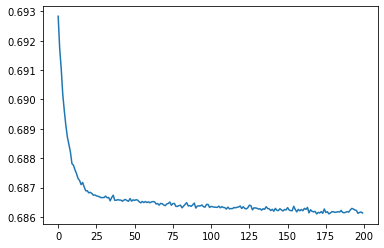

In [25]:
import matplotlib.pyplot as plt

plt.plot(model.history["loss"])

In [26]:
Y_prediction = (neural.predict(X_train_scaled) > 0.5).astype("int32")
Y_prediction = Y_prediction.squeeze()
display(Y_prediction)

results = pd.DataFrame( {"Predictions": Y_prediction, "Actual": y_train})
results

array([1, 0, 1, ..., 0, 1, 1])

,Predictions,Actual
Date,,
2020-04-16,1,1.0
2017-05-22,0,1.0
2017-11-15,1,0.0
2015-07-06,1,0.0
2018-10-30,1,1.0
...,...,...
2017-11-27,1,0.0
2018-08-29,1,1.0
2019-06-05,0,1.0
